In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
%matplotlib inline

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df=pd.read_csv('electronics_sample.csv')
df.head()

,overall,vote,reviewTime,reviewText,summary
0,2,0,2010-02-10,Tech support is the worst,1265760000
1,2,0,2016-10-24,Screws were missing from the bracket and beaut...,Spend a little more and get much better.
2,1,0,2017-07-10,Trouble connecting and staying connected via b...,1499644800
3,4,5,2013-05-02,I purchased this unit for our RV to replace an...,Receiver Offers a Lot of Flexibility & Complexity
4,3,0,2013-01-04,It works. Nuff said but the review requires 1...,It's a cable


In [ ]:
df.head(n=10)

,overall,vote,reviewTime,reviewText,summary
0,2,0,2010-02-10,Tech support is the worst,1265760000
1,2,0,2016-10-24,Screws were missing from the bracket and beaut...,Spend a little more and get much better.
2,1,0,2017-07-10,Trouble connecting and staying connected via b...,1499644800
3,4,5,2013-05-02,I purchased this unit for our RV to replace an...,Receiver Offers a Lot of Flexibility & Complexity
4,3,0,2013-01-04,It works. Nuff said but the review requires 1...,It's a cable
5,1,2,2015-10-26,I bought this and a viper alarm for my civic a...,No good/ Defective
6,4,6,2008-12-21,"I rescue cats, and I have one that will have t...","A Different Kind of Strong Odor, But it Masks ..."
7,1,0,2009-07-08,I purchased 6 of these in 2007; all were ~DOA....,6 of 6 cards had only 1 good port
8,3,0,2017-06-16,Nice cover because something is better than no...,Nice cover!
9,2,0,2017-09-05,Less than happy,1504569600


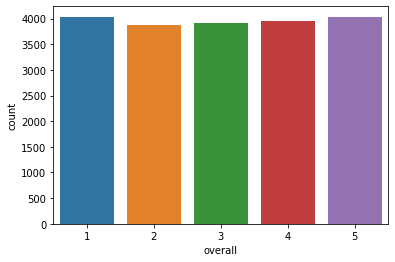

In [ ]:
sns.countplot(x=df['overall'])

In [ ]:
df.tail(n=10)

,overall,vote,reviewTime,reviewText,summary
19799,5,0,2016-09-10,Enough power to charge most any device to capa...,Five Stars
19800,1,0,2015-06-17,Not recognized after reboot/restart,1434499200
19801,5,0,2011-06-26,Having just finished wall mounting four speake...,GREAT PRODUCT $2.50 PER MOUNT
19802,3,0,2013-05-11,There are several kinds of plugs for Firewire....,This is not the correct adapter for a MacBook Pro
19803,5,0,2010-01-03,Cmara digital,1262476800
19804,3,0,2014-11-11,rendering lens useless in darkness,1415664000
19805,1,0,2015-03-14,One Star,1426291200
19806,4,0,2009-03-27,Decent Cable for the Money,1238112000
19807,3,2,2014-06-06,OK drop protection for reasonable price.,1402012800
19808,5,0,2016-06-20,Cheap and work great,1466380800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19809 entries, 0 to 19808
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     19809 non-null  int64 
 1   vote        19809 non-null  int64 
 2   reviewTime  19809 non-null  object
 3   reviewText  19808 non-null  object
 4   summary     19809 non-null  object
dtypes: int64(2), object(3)
memory usage: 773.9+ KB


In [ ]:
df.shape


(19809, 5)

In [ ]:
df1=df[['overall','reviewText']]

In [ ]:
df1.head()

,overall,reviewText
0,2,Tech support is the worst
1,2,Screws were missing from the bracket and beaut...
2,1,Trouble connecting and staying connected via b...
3,4,I purchased this unit for our RV to replace an...
4,3,It works. Nuff said but the review requires 1...


In [ ]:
df1.isna().sum()

overall       0
reviewText    1
dtype: int64

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isna().sum()

overall       0
reviewText    0
dtype: int64

In [ ]:
df1=df1.astype(str)

In [ ]:
def rem(text):
    tn= "".join([char for char in text if char not in string.punctuation])
    return tn
    

df1['clean']=df1['reviewText'].apply(lambda x: rem(x))

In [ ]:
df1.head()

,overall,reviewText,clean
0,2,Tech support is the worst,Tech support is the worst
1,2,Screws were missing from the bracket and beaut...,Screws were missing from the bracket and beaut...
2,1,Trouble connecting and staying connected via b...,Trouble connecting and staying connected via b...
3,4,I purchased this unit for our RV to replace an...,I purchased this unit for our RV to replace an...
4,3,It works. Nuff said but the review requires 1...,It works Nuff said but the review requires 16...


In [ ]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

def lemmatization(tokenized_text):
  text= [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(tokenized_text)]
  return text

df1['body_text_lemmatized'] = df1['clean'].apply(lambda x: lemmatization(x))

In [ ]:
def tok(text):
    t= re.split('\W+',text)
    return t

df1['clean1']=df1['reviewText'].apply(lambda x: tok(x.lower()))

stopword=nltk.corpus.stopwords.words('english')
def stopp(text):
    t= [word for word in text if word not in stopword]
    return t

df1['cleanest']=df1['body_text_lemmatized'].apply(lambda x: stopp(x))

In [ ]:
df1.head()

,overall,reviewText,clean,body_text_lemmatized,clean1,cleanest
0,2,Tech support is the worst,Tech support is the worst,"[Tech, support, be, the, bad]","[tech, support, is, the, worst]","[Tech, support, bad]"
1,2,Screws were missing from the bracket and beaut...,Screws were missing from the bracket and beaut...,"[Screws, be, miss, from, the, bracket, and, be...","[screws, were, missing, from, the, bracket, an...","[Screws, miss, bracket, beauty, dish, within, ..."
2,1,Trouble connecting and staying connected via b...,Trouble connecting and staying connected via b...,"[Trouble, connect, and, stay, connect, via, bl...","[trouble, connecting, and, staying, connected,...","[Trouble, connect, stay, connect, via, bluetooth]"
3,4,I purchased this unit for our RV to replace an...,I purchased this unit for our RV to replace an...,"[I, purchase, this, unit, for, our, RV, to, re...","[i, purchased, this, unit, for, our, rv, to, r...","[I, purchase, unit, RV, replace, old, AMFMCass..."
4,3,It works. Nuff said but the review requires 1...,It works Nuff said but the review requires 16...,"[It, work, Nuff, say, but, the, review, requir...","[it, works, nuff, said, but, the, review, requ...","[It, work, Nuff, say, review, require, 16, wor..."


In [ ]:
ps = nltk.PorterStemmer()

In [ ]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df1['body_text_stemmed'] = df1['cleanest'].apply(lambda x: stemming(x))

In [ ]:
df1.head()

,overall,reviewText,clean,body_text_lemmatized,clean1,cleanest,body_text_stemmed
0,2,Tech support is the worst,Tech support is the worst,"[Tech, support, be, the, bad]","[tech, support, is, the, worst]","[Tech, support, bad]","[tech, support, bad]"
1,2,Screws were missing from the bracket and beaut...,Screws were missing from the bracket and beaut...,"[Screws, be, miss, from, the, bracket, and, be...","[screws, were, missing, from, the, bracket, an...","[Screws, miss, bracket, beauty, dish, within, ...","[screw, miss, bracket, beauti, dish, within, w..."
2,1,Trouble connecting and staying connected via b...,Trouble connecting and staying connected via b...,"[Trouble, connect, and, stay, connect, via, bl...","[trouble, connecting, and, staying, connected,...","[Trouble, connect, stay, connect, via, bluetooth]","[troubl, connect, stay, connect, via, bluetooth]"
3,4,I purchased this unit for our RV to replace an...,I purchased this unit for our RV to replace an...,"[I, purchase, this, unit, for, our, RV, to, re...","[i, purchased, this, unit, for, our, rv, to, r...","[I, purchase, unit, RV, replace, old, AMFMCass...","[I, purchas, unit, RV, replac, old, amfmcasset..."
4,3,It works. Nuff said but the review requires 1...,It works Nuff said but the review requires 16...,"[It, work, Nuff, say, but, the, review, requir...","[it, works, nuff, said, but, the, review, requ...","[It, work, Nuff, say, review, require, 16, wor...","[It, work, nuff, say, review, requir, 16, word..."


In [ ]:
sentiment = {'1': 0,
            '2': 0,
            '3': 0,
            '4': 1,
            '5': 1}

df1["sentiment"] = df1["overall"].map(sentiment)

In [ ]:
df1.head()

,overall,reviewText,clean,body_text_lemmatized,clean1,cleanest,body_text_stemmed,sentiment
0,2,Tech support is the worst,Tech support is the worst,"[Tech, support, be, the, bad]","[tech, support, is, the, worst]","[Tech, support, bad]","[tech, support, bad]",0
1,2,Screws were missing from the bracket and beaut...,Screws were missing from the bracket and beaut...,"[Screws, be, miss, from, the, bracket, and, be...","[screws, were, missing, from, the, bracket, an...","[Screws, miss, bracket, beauty, dish, within, ...","[screw, miss, bracket, beauti, dish, within, w...",0
2,1,Trouble connecting and staying connected via b...,Trouble connecting and staying connected via b...,"[Trouble, connect, and, stay, connect, via, bl...","[trouble, connecting, and, staying, connected,...","[Trouble, connect, stay, connect, via, bluetooth]","[troubl, connect, stay, connect, via, bluetooth]",0
3,4,I purchased this unit for our RV to replace an...,I purchased this unit for our RV to replace an...,"[I, purchase, this, unit, for, our, RV, to, re...","[i, purchased, this, unit, for, our, rv, to, r...","[I, purchase, unit, RV, replace, old, AMFMCass...","[I, purchas, unit, RV, replac, old, amfmcasset...",1
4,3,It works. Nuff said but the review requires 1...,It works Nuff said but the review requires 16...,"[It, work, Nuff, say, but, the, review, requir...","[it, works, nuff, said, but, the, review, requ...","[It, work, Nuff, say, review, require, 16, wor...","[It, work, nuff, say, review, requir, 16, word...",0


In [ ]:
df2=df1[['overall','cleanest','sentiment']]

In [ ]:
import string
string.punctuation
    

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text_nopunct = " ".join([char for char in text if char not in string.punctuation])
    return text_nopunct
    

df2['body_text_lemmatized_1'] = df2['cleanest'].apply(lambda x: remove_punct(x))

df2.head()

,overall,cleanest,sentiment,body_text_lemmatized_1
0,2,"[Tech, support, bad]",0,Tech support bad
1,2,"[Screws, miss, bracket, beauty, dish, within, ...",0,Screws miss bracket beauty dish within week Sp...
2,1,"[Trouble, connect, stay, connect, via, bluetooth]",0,Trouble connect stay connect via bluetooth
3,4,"[I, purchase, unit, RV, replace, old, AMFMCass...",1,I purchase unit RV replace old AMFMCassette Ta...
4,3,"[It, work, Nuff, say, review, require, 16, wor...",0,It work Nuff say review require 16 word 9 word...


In [ ]:
df2['body_text_lemmatized_1']=df2['body_text_lemmatized_1'].str.lower()

In [ ]:
df2.head()

,overall,cleanest,sentiment,body_text_lemmatized_1
0,2,"[Tech, support, bad]",0,tech support bad
1,2,"[Screws, miss, bracket, beauty, dish, within, ...",0,screws miss bracket beauty dish within week sp...
2,1,"[Trouble, connect, stay, connect, via, bluetooth]",0,trouble connect stay connect via bluetooth
3,4,"[I, purchase, unit, RV, replace, old, AMFMCass...",1,i purchase unit rv replace old amfmcassette ta...
4,3,"[It, work, Nuff, say, review, require, 16, wor...",0,it work nuff say review require 16 word 9 word...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(df2["body_text_lemmatized_1"])

In [ ]:
print(text.shape)

(19808, 23273)


In [ ]:
print(text)

  (0, 3440)	0.48765311070684325
  (0, 19911)	0.5607376051876963
  (0, 20254)	0.6691545275542166
  (1, 22486)	0.14546106524347874
  (1, 13757)	0.18400833970009872
  (1, 9353)	0.14393740000093713
  (1, 12425)	0.19107072178652443
  (1, 19262)	0.27639039058613163
  (1, 22466)	0.2280573547513271
  (1, 22745)	0.2611570439755271
  (1, 6911)	0.39089650205539717
  (1, 3653)	0.3977299619396324
  (1, 4137)	0.3288521567920127
  (1, 13437)	0.2746847536493153
  (1, 18118)	0.44335826826127817
  (2, 3971)	0.3679784987786032
  (2, 22054)	0.41236937829150383
  (2, 19511)	0.3535054647984052
  (2, 5613)	0.6386711575111215
  (2, 21048)	0.40208998893928194
  (3, 6591)	0.0672254695455064
  (3, 7594)	0.08627469346902263
  (3, 3920)	0.12963589546644047
  (3, 22816)	0.03753162688185774
  (3, 2406)	0.12963589546644047
  :	:
  (19801, 20445)	0.2643727184192106
  (19801, 20512)	0.18147868603779166
  (19801, 16135)	0.19449481176270994
  (19801, 14702)	0.16219214537991739
  (19801, 10860)	0.2159944972857971
  (19801

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, df2["sentiment"], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

In [ ]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.8023725391216557
Train accuracy 0.8545374226934243


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9460
           1       0.87      0.76      0.81      6386

    accuracy                           0.85     15846
   macro avg       0.86      0.84      0.85     15846
weighted avg       0.86      0.85      0.85     15846

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2360
           1       0.81      0.67      0.73      1602

    accuracy                           0.80      3962
   macro avg       0.80      0.78      0.79      3962
weighted avg       0.80      0.80      0.80      3962



In [ ]:
import pickle
pickl= {'vectorizer':vectorizer, 'model': classifier}
with open("logistic_regression.p", "wb") as f:
    pickle.dump(pickl, f)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
svm = LinearSVC(C=0.075)
svm.fit(x_train,y_train)
y_pred_tr = svm.predict(x_train)
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      9460
           1       0.86      0.73      0.79      6386

    accuracy                           0.84     15846
   macro avg       0.85      0.82      0.83     15846
weighted avg       0.85      0.84      0.84     15846

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2360
           1       0.81      0.67      0.73      1602

    accuracy                           0.80      3962
   macro avg       0.80      0.78      0.79      3962
weighted avg       0.80      0.80      0.80      3962



In [ ]:
import pickle
pickl= {'vectorizer':vectorizer, 'model': svm}
with open("svm.p", "wb") as f:
    pickle.dump(pickl, f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(min_samples_leaf=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      9460
           1       0.87      0.68      0.76      6386

    accuracy                           0.83     15846
   macro avg       0.84      0.81      0.82     15846
weighted avg       0.83      0.83      0.83     15846

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      2360
           1       0.83      0.60      0.70      1602

    accuracy                           0.79      3962
   macro avg       0.80      0.76      0.77      3962
weighted avg       0.79      0.79      0.78      3962



In [ ]:
import pickle
pickl= {'vectorizer':vectorizer, 'model': classifier}
with open("randomforest.p", "wb") as f:
    pickle.dump(pickl, f)